$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\se}[1]{\,\left\{#1\right\}\,} $
$ \newcommand{\norm}[1]{\left\Vert#1\right\Vert} $
# Regressão polinomial por mínimos quadrados

## $ \S 1 $ Descrição da regressão polinomial

Seja
$$
(x_0, y_0),\, (x_1, y_1), \cdots , (x_M,y_M)
$$
um conjunto de dados
aos quais se pretende ajustar um polinômio de grau $ \le n $, com $ n \le M $.

Seguindo o método dos mínimos quadrados, começamos tomando como funções-base os monômios
$$
f_k(x) = x^k \qquad (k = 0, 1, \dots, n)\,.
$$
Precisamos escolher os coeficientes $ a_k \in \mathbb R $ do polinômio procurado
$$
p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_n x^n
$$
de modo que a soma dos quadrados dos **resíduos** $ r_i = y_i - p(x_i) $,
$$
S(a_0,a_1,\dots,a_n) = \sum_{i=0}^M \big[y_i - p(x_i)\big]^2\,,
$$
seja minimizada.

Sob certas condições gerais (cf. Teorema 1.1), existe uma escolha única destes parâmetros que minimiza $ S $. Seja como for, qualquer ponto de mínimo deve ser em particular um ponto crítico de $ S $, i.e., deve satisfazer:
$$
\frac{\partial S}{\partial a_k} = -2 \sum_{i=0}^M \big(y_i - p(x_i)\big)x_i^k = 0 \qquad (\text{para cada }k = 0, 1, \dots, n)\,.
$$
Equivalentemente,
$$
\sum_{i=0}^M p(x_i)x_i^k = \sum_{k=0}^n \Bigg(\sum_{i=0}^M x^{i+k}\Bigg)a_k = \sum_{i=0}^My_ix_i^k \qquad (\text{para cada }k = 0, 1, \dots, n)\,.
$$
Na forma matricial, estas equações podem ser reescritas como
\begin{equation*}\label{E:normal}
\boxed{\ \begin{bmatrix}
M + 1 & \sum x_i & \sum x_i^2 & \cdots & \sum x_i^n \\
\sum x_i & \sum x_i^2 & \sum x_i^3 & \cdots & \sum x_i^{n+1} \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 & \cdots & \sum x_i^{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x^{n} & \sum x_i^{n+1} & \sum x_i^{n+2} & \cdots & \sum x_i^{2n}
\end{bmatrix}
\begin{bmatrix}
\vphantom{\sum x^{2n}}a_0 \\
\vphantom{\sum x^{2n}}a_1 \\
\vphantom{\sum x^{2n}}a_2 \\
\vdots \\
\vphantom{\sum x^{2n}}a_n
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_iy_i \\
\sum x_i^{2}y_i \\
\vdots \\
\sum x_i^{n}y_i
\end{bmatrix}\ 
\vphantom{
\begin{bmatrix}
\sum y_i \\
\sum x_iy_i \\
\sum x_i^{2}y_i \\
\vdots \\
\sum x_i^{n}y_i \\
\sum x_i^{n}y_i
\end{bmatrix}}} \tag{1}
\end{equation*}
ou ainda
$$
\boxed{\mbf C\mbf a = \mbf b \quad \text{onde}\quad \mbf C = \big(c_{kj}\big) = \bigg( \sum_i x_i^{k + j} \bigg)\,, \quad \mbf a = \big(a_k\big) \quad \text{e} \quad \mbf b = \bigg (\sum_i x_i^k y_i \bigg) \quad (k,\,j = 0, 1, \dots, n)}
$$

Em qualquer uma destas formas, as equações \eqref{E:normal} são conhecidas como **equações normais**. Observe que $ \mbf C $ é uma matriz simétrica $ (n + 1) \times (n + 1) $ e que o sistema acima é *linear* nas variáveis $ a_0,\, a_1, \cdots,\,a_n $. Podemos portanto utilizar qualquer um dos métodos para solução de sistemas lineares estudados anteriormente para resolvê-lo.

## $ \S 2 $ Existência e unicidade do polinômio $ \hat p $ ajustado 

**Teorema 1.1:** *Sejam $ (x_0,y_0),\,(x_1,y_1),\,\dots,\,(x_M,y_M) $ dados e $ n \le M $. Se dentre os $ x_i $ é possível escolher um subcojunto de $ n $ elementos mutuamente distintos, então as equações normais \eqref{E:normal} possuem uma única solução $ \hat{\mbf a} = (\hat a_0, \hat a_1, \dots, \hat a_n) $, que é de fato o mínimo global de $ S $.* $ \blacksquare $

Provaremos este teorema como um corolário de um resultado mais amplo no próximo caderno.

Concluímos portanto que, satisfeita a hipótese do teorema, existe um *único* polinômio 
$$
\hat{p}(x) = \hat{a}_0 + \hat{a}_1x + \hat{a}_2x^2 + \cdots + \hat{a}_nx^n
$$
de grau $ \le n $ que melhor se ajusta aos dados no sentido do princípio dos mínimos quadrados.

📝 Na maioria das aplicações da regressão polinomial, os $ x_i $ são todos distintos. Conseqüentemente o polinômio ajustado é único pelo Teorema (desde que $ n \le M $).

📝 No caso em que $ n = M $ e os $ x_i $ são distintos, $ \hat p $ é o polinômio interpolador dos dados, estudado anteriormente.

📝 Em geral a regressão polinomial é utilizada somente com $ n $ baixo (via de regra, $ n < 6 $).

## $ \S 3 $ Implementação do ajuste de polinômios por mínimos quadrados

Na implementação abaixo da regressão polinomial, utilizaremos o método de Horner (discutido num caderno anterior) para efetuar a avaliação de $ \hat p $ num ponto qualquer.

In [1]:
def horner(coefs, x):
    """
    Dados um polinômio p representado pela lista de seus coeficientes
    [c_0, c_1, ..., c_n] (onde c_k é o coeficiente do monômio de grau k)
    e um número x, retorna o valor de p(x) calculado pelo método de Horner.
    """
    y = coefs.pop()    # extrai o último coeficiente c_n da lista
    while coefs:       # enquanto a lista de coeficientes não for vazia
        y *= x
        y += coefs.pop()
    return y

In [50]:
def ajuste_polinomio(xs, ys, n):
    """
    Ajusta um polinômio de grau n aos dados (x_i, y_i) usando o
    método dos mínimos quadrados.
    Entrada:
        * Duas listas xs e ys de mesmo comprimento M + 1.
        * O grau n < M do polinômio a ser ajustado.
    Saída:
        * A função polinomial p = p(x) que melhor se adapta aos dados.
    """
    import numpy as np
    
    
    def polinomio(x):
        """ Retorna o valor do polinômio ajustado p em x. """
        # 'a' é o vetor (a_0, a_1, ..., a_n) solução das equações normais
        return horner(a.tolist(), x)
    
    
    M = len(xs) - 1
    assert len(ys) == M + 1
    assert n <= M
    somas_x = list()              # Armazena a soma das potências x_i^q dos x_i
    somas_x_y = list()            # Armazena a soma de y_i x_i^q
    for q in range(2 * n + 1):    # q percorre o conjunto dos expoentes
        soma_x = sum(x**q for x in xs)
        somas_x.append(soma_x)
        if q <= n:
            soma_x_y = sum(xs[k]**q * ys[k] for k in range(M + 1))
            somas_x_y.append(soma_x_y)
            
    C = np.zeros((n + 1, n + 1))  # Matriz dos coeficientes das equações normais
    b = np.zeros(n + 1)           # Lado direito das equações normais
    # Preenchendo C e b:
    for i in range(n + 1):
        for j in range(i, n + 1):
            C[i][j] = C[j][i] = somas_x[i + j]
        b[i] = somas_x_y[i]
    a = np.linalg.solve(C, b)     # Resolve as equações normais
    
    return polinomio

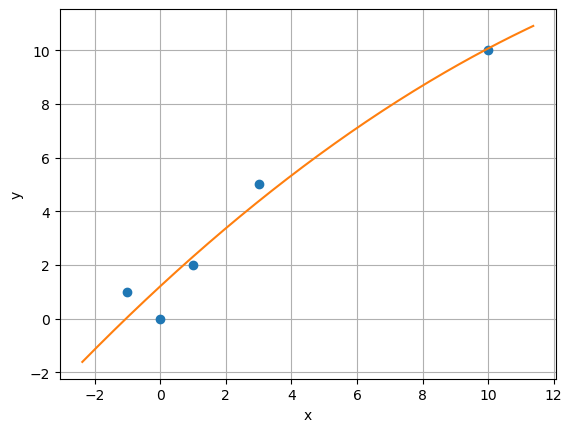

In [48]:
xs = [-1, 0, 1, 3, 10]
ys = [1, 0, 2, 5, 10]
p = ajuste_polinomio(xs, ys, 2)
exibe_dados_e_funcao(xs, ys, p)

In [49]:
def exibe_dados_e_funcao(xs, ys, f):
    """
    Exibe um conjunto de pontos (x_i, y_i) e o gráfico de f.
    Entradas:
        * Duas listas xs e ys de mesmo comprimento.
        * Uma função f de uma variável.
    Saída: nenhuma.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    assert len(xs) == len(ys)
    x_min = min(xs)
    x_max = max(xs)
    # Para o gráfico não ficar apertado, introduzimos uma "folga":
    folga = (x_max - x_min) / 8
    xs_f = np.linspace(x_min - folga, x_max + folga, num=201)
    ys_f = np.array([f(x) for x in xs_f]) 
    
    plt.plot(xs, ys, 'o')
    plt.plot(xs_f, ys_f, '-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    return None



## ⚡ $ \S 5 $ Interpretação geométrica alternativa para a reta de mínimos quadrados

### $ 5.1 $ Os coeficientes da reta de mínimos quadrados via projeção ortogonal

O objetivo desta seção é discutir uma interpretação alternativa para os coeficientes $ \hat a $ e $ \hat b $ da reta de mínimos quadrados associada a um conjunto de dados $ (x_0, y_0), \dots, (x_M, y_M) $ (com $ x_i \ne x_j $ para algum par $ i,\, j $). Em particular, este novo ponto de vista fornece uma nova demonstração da unicidade desta reta.

Sejam 
$$
\mbf x = (x_0,x_1,\dots,x_M)\,, \quad \mbf y = (y_0,y_1,\dots,y_{M}) \quad \text{e} \quad \mbf u = (1,1,\dots,1) \in \mathbb R^{M+1}\,.
$$
Em termos destes vetores, a função $ S $ que gostaríamos de minimizar para encontrar a reta de mínimos quadrados pode ser escrita como
$$
S(a, b) = \sum_{i=0}^M \big[y_i - (a x_i + b)\big]^2 = \norm{\mbf y - (a\,\mbf x + b \,\mbf u)}^2\,,
$$
onde $ \norm{\cdot} $ denota a norma euclidiana em $ \mathbb R^{M+1} $. Minimizar $ S $  é equivalente a escolher os coeficientes $ a $ e $ b $ na combinação linear
$$
a\,\mbf x + b\,\mbf u \quad (a,\,b \in \mathbb R)
$$
dos vetores $ \mbf x $ e $ \mbf u $ de modo que a distância do vetor resultante a $ \mbf y $ seja a menor possível.

Como por hipótese os $ x_i $ não são todos iguais, $ \mbf x $ e $ \mbf u $ são linearmente independentes, logo geram um plano $ P $ de dimensão $ 2 $ dentro de $ \mathbb R^{M+1} $. Podemos decompor $ \mbf y $ como
$$
\mbf y = \mbf y^\perp + (\mbf y - \mbf y^\perp)\,,
$$
onde $ \mbf y^\perp $ é a componente de $ \mbf y $ ortogonal a $ P $ e $ \mbf {\bar y} = (\mbf y - \mbf y^\perp) $ a componente que pertence a ele, ou equivalentemente a projeção ortogonal de $ \mbf y $ em $ P $. Então
\begin{alignat*}{9}
S(a,b) &= \norm{\mbf y - (a\,\mbf x + b \,\mbf u)}^2 \\
&= \norm{\mbf y^\perp + (\mbf y - \mbf y^\perp) - (a\,\mbf x + b \,\mbf u)}^2 \\
&= \norm{\mbf y^\perp}^2 + \norm{\mbf {\bar y} - (a\,\mbf x + b \,\mbf u)}^2
\end{alignat*}
pelo teorema de Pitágoras. Agora, como $ \mbf {\bar y} \in P $ e $ \mbf x $ e $ \mbf u $ são l.i., existem *únicos* $ \hat a $ e $ \hat b $ em $ \mathbb R $ tais que
$$
\mbf {\bar y} = \hat a\,\mbf x + \hat b\,\mbf u\,.
$$
Este par $ (\hat a, \hat b) $ é portanto o único ponto de mínimo global de $ S $. Além disto, a menor soma dos quadrados dos resíduos é dada por
$$
S(\hat a, \hat b) = \norm{\mbf y^\perp}^2\,.
$$

Este argumento fornece não só uma demonstração de que a reta de mínimos quadrados existe, mas uma maneira de encontrá-la: basta projetar $ \mbf y $ ortogonalmente no plano $ P $ e resolver a equação linear
$$
\mbf {\bar y} = a\,\mbf x + b\,\mbf u\,.
$$
O desvio padrão é dado por
$$
\sigma = \frac{\norm{\mbf y^\perp}}{\sqrt{M - 1}}\,.
$$

### $ 5.2 $ Fórmula para a projeção ortogonal

Seja $ \mbf A $ a matriz $ (M + 1) \times 2 $ seguinte:
$$
\mbf A =
\begin{bmatrix}
 \vert & \vert \\
 \mbf x & \mbf u \\
 \vert & \vert
\end{bmatrix}\,.
$$
A imagem de $ \mbf A $ coincide com o $ 2 $-plano $ P $ gerado por $ \mbf x $ e $ \mbf u $ em $ \mathbb R^{m+1} $. Como acima, seja $ \mbf {\bar y} $ a projeção ortogonal de $ \mbf y $ em $ P $, e seja $ \mbf v = \big( \hat a, \hat b \big) $, de modo que $ \mbf A \mbf v = \mbf {\bar y} $. Então $ \mbf v $ é o único vetor em $ \mathbb R^2 $ tal que
$$
\mbf y - \mbf A \mbf v = \mbf y - \mbf {\bar y} = \mbf y^\perp
$$
é perpendicular a $ P $, ou seja, ortogonal tanto a $ \mbf u $ quanto a $ \mbf x $. Em termos de $ \mbf A $, esta última condição é equivalente a:
$$
\mbf A^t\big(\mbf y - \mbf A \mbf v\big) = \mbf 0\,, \quad \text{ou seja}\,, \quad
\mbf A^t \mbf A \mbf v = \mbf A^t \mbf y
$$
e portanto
$$
\boxed{\mbf v = (\mbf A^t \mbf A)^{-1} \mbf A^t \mbf y} \quad \text{e} \quad \mbf A \mbf v = \boxed{\mbf {\bar y} = \mbf A\,(\mbf A^t \mbf A)^{-1} \mbf A^t \mbf y}
$$

⚠️ Note que $ A $ é uma matriz $ (M + 1) \times (n + 1) $, portanto em geral sequer faz sentido falar da inversa de $ \mbf A $. Em particular, *não* podemos expressar $ \mbf v $ simplesmente como $ \mbf A^{-1} \mbf y $. Contudo, $ \mbf A^t\mbf A $ é uma matriz simétrica de dimensões $ (n + 1) \times (n + 1) $. Ela é invertível desde que seja possível extrair um subconjunto de $ \left\{x_0,x_1,\cdots,x_M\right\} $ com $ n + 1 $ valores $ x_i $ mutuamente distintos.